In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [45]:
# stimulated annealing & travelling salesperson problem, n-queen
# genetic algo & Knapsack

# Global import
!pip install mlrose-hiive

In [46]:
# Section A
# 1. Optimization problem: Travelling salesperson problem
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [47]:
# 1.1 Define a fitness function object

# Create list of city coordinates
coords_list_array = []
sizes = [8, 16, 32, 48, 64, 80]

for s in sizes:
    arr = np.random.randint(0, 10, size=(s,2))
    coords_list = list(map(tuple, arr))
    coords_list_array.append(coords_list)

# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list_array[0])

In [48]:
# 1.2 Define an optimization problem object

# Define optimization problem object
# maximize=False bc want to minimize the fitness_fn/fitness_coords
problem_fit = mlrose.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize=False)

In [49]:
# 1.3 Select and run a randomized optimization algo (in the order of RHC, SA, GA, MIMC)

max_iters_array = np.arange(1, 500, 100)
fitness_score_algo_array = [[], [], [], []]
wall_clock_time_algo_array = [[], [], [], []]
fitness_curve_algo_array_300 = []
algo_func_array = [mlrose.random_hill_climb, mlrose.simulated_annealing, mlrose.genetic_alg, mlrose.mimic]

for cur_iter in max_iters_array:
    for i in range(len(algo_func_array)):
        startTime = time.time()
        best_state, best_fitness, fitness_curve = algo_func_array[i](problem_fit,
                                                      max_attempts = 100, random_state = 2, 
                                                      curve = True, max_iters = cur_iter.item())
        endTime = time.time()
        fitness_score_algo_array[i].append(best_fitness)
        wall_clock_time_algo_array[i].append(endTime - startTime)


In [50]:
# 1.4 plot

def plotAgainstIteration(x, y, xLabel, yLabel, fileName):
    plt.plot(x, y[0], 'b', label='RHC')
    plt.plot(x, y[1], 'g', label='SA', linestyle="--")
    plt.plot(x, y[2], 'r', label='GA')
    plt.plot(x, y[3], 'm', label='MIMC')
    plt.legend()
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.savefig(fileName)
    plt.show()

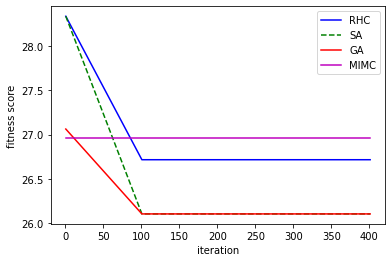

In [51]:
# plot fitness score vs iterations
plotAgainstIteration(max_iters_array, fitness_score_algo_array, "iteration", "fitness score", "TSP_4_search_algo_with_their_fitness_score_vs_iterations")

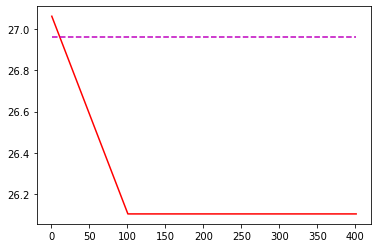

In [52]:
# GA
plt.plot(max_iters_array, fitness_score_algo_array[2], 'r', label='GA')
plt.plot(max_iters_array, fitness_score_algo_array[3], 'm', label='MIMC', linestyle="--")

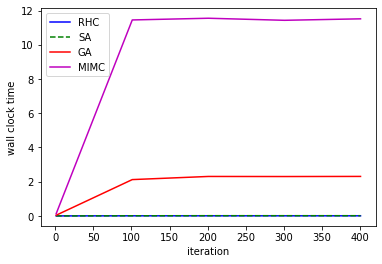

In [53]:
# plot wall clock time vs iteration
plotAgainstIteration(max_iters_array, wall_clock_time_algo_array, "iteration", "wall clock time", "TSP_4_search_algo_with_their_wall_clock_time_vs_iterations")

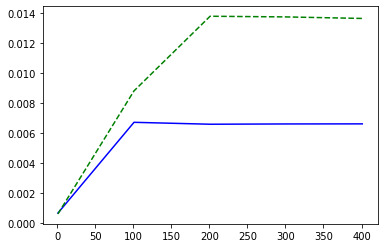

In [54]:
plt.plot(max_iters_array, wall_clock_time_algo_array[0], 'b', label='RHC')
plt.plot(max_iters_array, wall_clock_time_algo_array[1], 'g', label='SA', linestyle="--")

In [55]:
# problem size
# 全部重走一遍？！！
wall_clock_time_with_sizes_array = []
fitness_score_with_sizes_array = []
function_evaluation_with_sizes_array = []

for i in range(len(algo_func_array)):
    cur_algo_clock_time = []
    cur_fitness_score = []
    function_evaluation = []
    for j in range(len(sizes)):
        fitness_coords = mlrose.TravellingSales(coords = coords_list_array[j])
        problem_fit = mlrose.TSPOpt(length = sizes[j], fitness_fn = fitness_coords, maximize=False)
        startTime = time.time()
        best_state, best_fitness, fitness_curve = algo_func_array[i](problem_fit,
                                                          max_attempts = 100, random_state = 2, 
                                                          curve = True, max_iters = 200)
        endTime = time.time()
        cur_algo_clock_time.append(endTime - startTime)
        cur_fitness_score.append(fitness_curve[:,0][-1])
        function_evaluation.append(fitness_curve[:,1][-1])
        
    wall_clock_time_with_sizes_array.append(cur_algo_clock_time)
    fitness_score_with_sizes_array.append(cur_fitness_score)
    function_evaluation_with_sizes_array.append(function_evaluation)

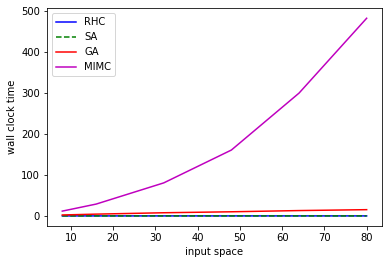

In [56]:
# plot wall clock time vs input size
plotAgainstIteration(sizes, wall_clock_time_with_sizes_array, "input space", "wall clock time", "TSP_4_search_algo_with_their_wall_clock_time_vs_input_space")


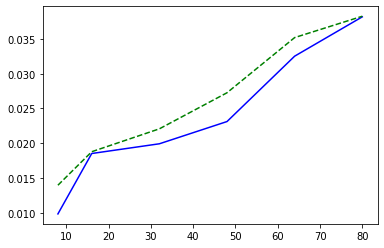

In [57]:
plt.plot(sizes, wall_clock_time_with_sizes_array[0], 'b', label='RHC')
plt.plot(sizes, wall_clock_time_with_sizes_array[1], 'g', label='SA', linestyle="--")

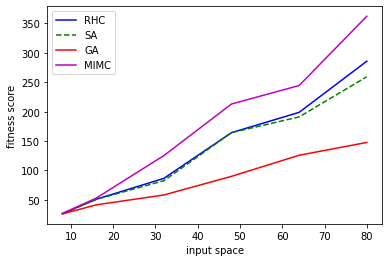

In [58]:
# plot fitness score vs input size
plotAgainstIteration(sizes, fitness_score_with_sizes_array, "input space", "fitness score", "TSP_4_search_algo_with_their_fitness_score_vs_input_space")


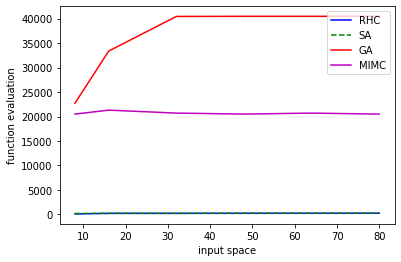

In [59]:
# plot function evaluation vs input size
plotAgainstIteration(sizes, function_evaluation_with_sizes_array, "input space", "function evaluation", "TSP_4_search_algo_with_their_function_evaluation_vs_input_space")


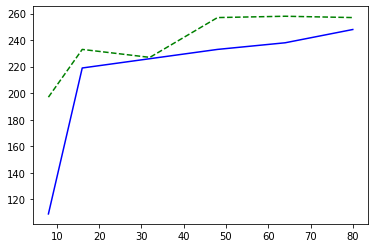

In [60]:
plt.plot(sizes, function_evaluation_with_sizes_array[0], 'b', label='RHC')
plt.plot(sizes, function_evaluation_with_sizes_array[1], 'g', label='SA', linestyle="--")

In [61]:
algo_func_array = [mlrose.random_hill_climb, mlrose.simulated_annealing, mlrose.genetic_alg, mlrose.mimic]
coords_list_array = []
sizes = [8, 48, 64, 80]

for s in sizes:
    arr = np.random.randint(0, 10, size=(s,2))
    coords_list = list(map(tuple, arr))
    coords_list_array.append(coords_list)

In [62]:
fitness_curve_x_array = []
fitness_curve_y_array = []
rhc_fitness_curve = 0
sa_fitness_curve = 0
ga_fitness_curve = 0
mimc_fitness_curve = 0

for i in range(len(algo_func_array)):
    fitness_coords = mlrose.TravellingSales(coords = coords_list_array[0])
    problem_fit = mlrose.TSPOpt(length = sizes[0], fitness_fn = fitness_coords, maximize=False)
    best_state, best_fitness, fitness_curve = algo_func_array[i](problem_fit,
                                                      max_attempts = 100, random_state = 2, 
                                                      curve = True, max_iters = 300)
    fitness_curve_x_array.append(fitness_curve[:,1])
    fitness_curve_y_array.append(fitness_curve[:,0])
    if (i == 0):
        rhc_fitness_curve = fitness_curve
    elif (i == 1):
        sa_fitness_curve = fitness_curve
    elif (i == 2):
        ga_fitness_curve = fitness_curve
    else:
        mimc_fitness_curve = fitness_curve


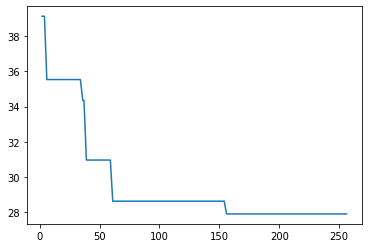

In [63]:
y = rhc_fitness_curve[:,0]
x = rhc_fitness_curve[:,1]
plt.plot(x, y)

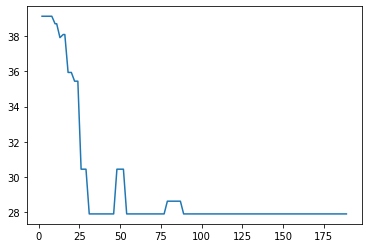

In [64]:
y = sa_fitness_curve[:,0]
x = sa_fitness_curve[:,1]
plt.plot(x, y)

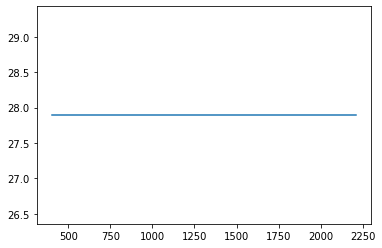

In [65]:
y = ga_fitness_curve[:,0][0:10]
x = ga_fitness_curve[:,1][0:10]
plt.plot(x, y)

2211.0

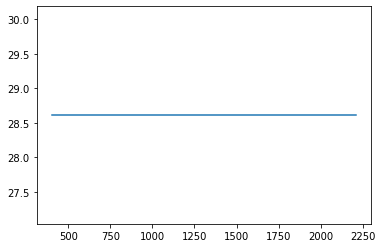

In [66]:
y = mimc_fitness_curve[:,0][0:10]
x = mimc_fitness_curve[:,1][0:10]
plt.plot(x, y)
np.max(x)

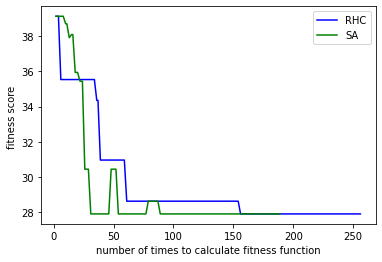

'\nplt.plot(fitness_curve_x_array[0], fitness_curve_y_array[0], \'b\', label=\'RHC\')\nplt.plot(fitness_curve_x_array[1], fitness_curve_y_array[1], \'g\', label=\'SA\')\nplt.plot(fitness_curve_x_array[2], fitness_curve_y_array[2], \'r\', label=\'GA\')\nplt.plot(fitness_curve_x_array[3], fitness_curve_y_array[3], \'m\', label=\'MIMC\')\nplt.legend()\nplt.xlabel(\'iteration\')\nplt.ylabel(\'fitness score \')\nplt.savefig("TSP_4_search_algo_with_their_fitness_score_vs_iteration")\nplt.show()\n'

In [67]:
plt.plot(fitness_curve_x_array[0], fitness_curve_y_array[0], 'b', label='RHC')
plt.plot(fitness_curve_x_array[1], fitness_curve_y_array[1], 'g', label='SA')
plt.legend()
plt.xlabel('number of times to calculate fitness function')
plt.ylabel('fitness score ')
plt.savefig("TSP_RHC_SA_algo_with_their_fitness_score_vs_iteration")
plt.show()

'''
plt.plot(fitness_curve_x_array[0], fitness_curve_y_array[0], 'b', label='RHC')
plt.plot(fitness_curve_x_array[1], fitness_curve_y_array[1], 'g', label='SA')
plt.plot(fitness_curve_x_array[2], fitness_curve_y_array[2], 'r', label='GA')
plt.plot(fitness_curve_x_array[3], fitness_curve_y_array[3], 'm', label='MIMC')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('fitness score ')
plt.savefig("TSP_4_search_algo_with_their_fitness_score_vs_iteration")
plt.show()
'''

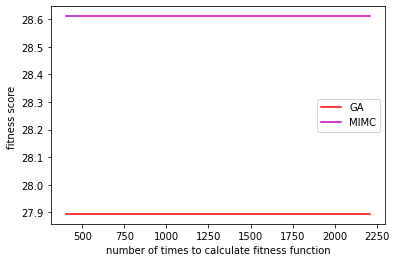

In [68]:
plt.plot(fitness_curve_x_array[2][:10], fitness_curve_y_array[2][:10], 'r', label='GA')
plt.plot(fitness_curve_x_array[3][:10], fitness_curve_y_array[3][:10], 'm', label='MIMC')
plt.legend()
plt.xlabel('number of times to calculate fitness function')
plt.ylabel('fitness score ')
plt.savefig("TSP_GA_MIMC_algo_with_their_fitness_score_vs_iteration")
plt.show()